# Aim

Now that we somewhat trust tip-tilt generation, this notebook attempts to build a control scheme to correct tip-tilt aberrations.

In [1]:
from aberrations import times, make_atm_data
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
pos = make_atm_data()

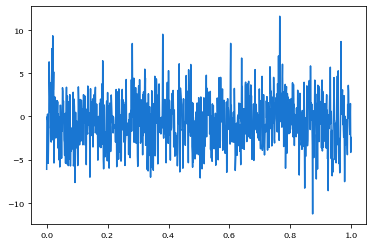

In [3]:
plt.plot(times, pos[0])

In [4]:
pos_x = pos[0].flatten()

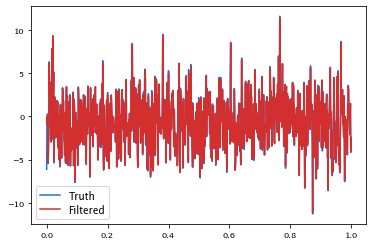

In [5]:
# first idea: you could just pretend it's not there and correct it the same way you would a vibration signal.
# for now there's no measurement noise in this.

from observer import *
steps = int(f_sampling * time_id)
state, A, P, Q, H, R = make_kfilter(*vibe_fit_freq(noise_filter(get_psd(pos_x)), N=20))
states_r = np.zeros((steps, state.size))
for k in range(steps):
    state, P = update(H, P, R, state, pos_x[k])
    states_r[k] = state
    state, P = predict(A, P, Q, state)
    
pos_r = np.array([H.dot(state) for state in states_r]).flatten()
    
plt.plot(times, pos_x, label="Truth")
plt.plot(times, pos_r, label="Filtered")
plt.legend()

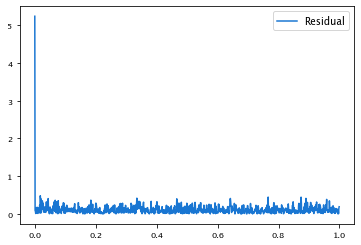

In [6]:
res = np.abs(pos_r - pos_x)
plt.plot(times, res, label="Residual")
plt.legend()

In [7]:
print(np.mean(res))

0.11823908988146144
